In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import os
import os.path, time
import glob
from scipy.interpolate import spline
from scipy.interpolate import interp1d

In [3]:
path = "/home/ml/kkheta2/tmp/unreal_checkpoints/llarla/" #provide path where results are stored, example: "/Attention_UNREAL"
folder_name1 = "baseline/results/" #only this to change for each experiment eg baseline, foveate
#folder_name2 = "foveate/results/"
folder_name2 = "foveate_alpha0.65/results/"


#folder_names = [folder_name1, folder_name2, folder_name3]
folder_names = [folder_name1, folder_name2]

full_filenames_to_read = []
for folder_name in folder_names:
    full_filenames_to_read.append([])
    full_path = os.path.join(path, folder_name)
    extension = 'csv'
    os.chdir(full_path)
    filenames = [i for i in glob.glob('*.{}'.format(extension))]  
    for z in range(len(filenames)):
        full_filenames_to_read_temp = os.path.join(full_path, filenames[z])
        full_filenames_to_read[-1].append(full_filenames_to_read_temp)

In [4]:
print(full_filenames_to_read[1])

['/home/ml/kkheta2/tmp/unreal_checkpoints/llarla/foveate_alpha0.65/results/run_run5-tag-score.csv', '/home/ml/kkheta2/tmp/unreal_checkpoints/llarla/foveate_alpha0.65/results/run_run2-tag-score.csv', '/home/ml/kkheta2/tmp/unreal_checkpoints/llarla/foveate_alpha0.65/results/run_run7-tag-score.csv', '/home/ml/kkheta2/tmp/unreal_checkpoints/llarla/foveate_alpha0.65/results/run_run6-tag-score.csv', '/home/ml/kkheta2/tmp/unreal_checkpoints/llarla/foveate_alpha0.65/results/run_run3-tag-score.csv', '/home/ml/kkheta2/tmp/unreal_checkpoints/llarla/foveate_alpha0.65/results/run_run1-tag-score.csv', '/home/ml/kkheta2/tmp/unreal_checkpoints/llarla/foveate_alpha0.65/results/run_run4-tag-score.csv']


In [5]:
params = {
    'runs': 7, 
    'max_steps': 10000000,
    'experiments': 2
}

runs_data = []
for j in range(len(full_filenames_to_read)):
    runs_data.append([])
    for k in range(len(full_filenames_to_read[j])):
        run_k_data = pd.read_csv(os.path.join(full_path, full_filenames_to_read[j][k]), sep=',', header=0, engine='python')
        runs_data[-1].append(run_k_data)
        
    
print(len(runs_data))

2


In [6]:
score_all_runs = np.zeros((params['experiments'],params['runs'], params['max_steps']))
for experiment in range(params['experiments']):
    for run in range(params['runs']):
        time_step = runs_data[experiment][run]['Step']
        score = runs_data[experiment][run]['Value']
        for i in range(len(time_step)-1):
            if time_step[i] > params['max_steps']:
                break
            score_all_runs[experiment, run, time_step[i]:] = score[i]

In [7]:
print(score_all_runs.shape)

(2, 7, 10000000)


In [8]:
#Average score from all 4 runs
#Compute mean and variance in averaged score 

experiments_avgscore_allruns = np.mean(score_all_runs, axis=1)
experiments_varscore_allruns = np.var(score_all_runs, axis=1)
experiments_stddevscore_allruns = np.std(score_all_runs, axis=1)

In [9]:
print(experiments_stddevscore_allruns[0].max())

40.294831795005116


In [14]:

start = 0.0
stop = 1.0
cm_subsection = np.linspace(start, stop, 4)
colors = [ cm.Dark2(x) for x in cm_subsection ]
fname = '/home/ml/kkheta2/tmp/unreal_checkpoints/llarla/figures/MultipleRunsLearningCurve.png'

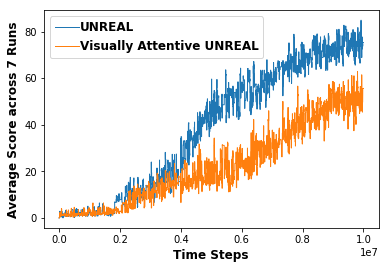

In [21]:
x = np.linspace(0,10000000,10000000)
x_new = np.linspace(0,10000000,100)
#label = ["UNREAL", "Attentive UNREAL alpha=0.69", "Attentive UNREAL alpha=0.65"]
label = ["UNREAL", "Visually Attentive UNREAL"]
for experiment in range(params['experiments']):
    #power_smooth = interp1d(x, experiments_avgscore_allruns[experiment], kind="quadratic")
    #plt.plot(x_new, power_smooth(x_new), label =label[experiment] , linewidth = 2) 
    #error = np.std(power_smooth(x_new))
    plt.plot(x, experiments_avgscore_allruns[experiment], label =label[experiment] , linewidth = 1)  
    #plt.fill_between(x, power_smooth(x_new)-error, power_smooth(x_new)+error, color='red')

plt.xlabel("Time Steps", fontsize=12, weight='bold')
plt.ylabel("Average Score across 7 Runs",fontsize=12, weight='bold')
#plt.fill_between(x, baseline_avgscore-baseline_stddevscore, baseline_avgscore+baseline_stddevscore, color='red')
plt.legend(loc=0, handletextpad=0.1,prop={'weight':'bold', 'size': 12})
plt.savefig(fname, dpi=None, orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0,
        frameon=None)
plt.show()
plt.close()

/home/ml/kkheta2/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


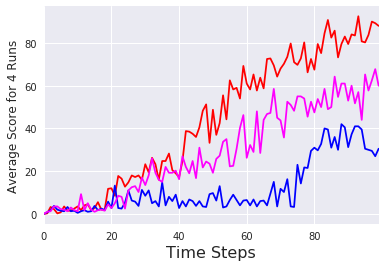

In [151]:
#sns.set(style="darkgrid")
colors = ['red', 'blue', 'magenta']
x = np.linspace(0,10000000,10000000)
x_new = np.linspace(0,10000000,100)
label = ["UNREAL", "Attentive UNREAL alpha=0.69", "Attentive UNREAL alpha=0.65"]
for experiment in range(params['experiments']):
    power_smooth = interp1d(x, experiments_avgscore_allruns[experiment])
    sns.tsplot(data=power_smooth(x_new),color=colors[experiment], legend = label[experiment])
    #sns.tsplot(data=experiments_avgscore_allruns[experiment], ci="sd", err_style="ci_band", color=colors[experiment], interpolate=True)
    
plt.xlabel("Time Steps", fontsize=16)
plt.ylabel("Average Score for 4 Runs",fontsize=12)
#plt.fill_between(x, baseline_avgscore-baseline_stddevscore, baseline_avgscore+baseline_stddevscore, color='red')
plt.legend(prop={'size': 12}, loc=0, handletextpad=0.1)
plt.show()



/home/ml/kkheta2/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


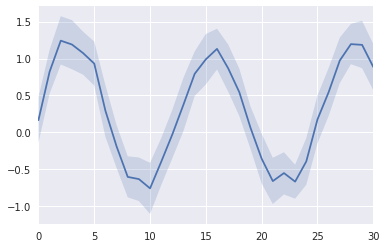

In [7]:
x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)
ax = sns.tsplot(data=data)